In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
#Find the column names in the Station table
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x26e3e586330>,
 'latitude': 21.2716,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168}

In [11]:
#Find the column names in the Measurement table
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x26e3e586db0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

In [12]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

2016-08-03


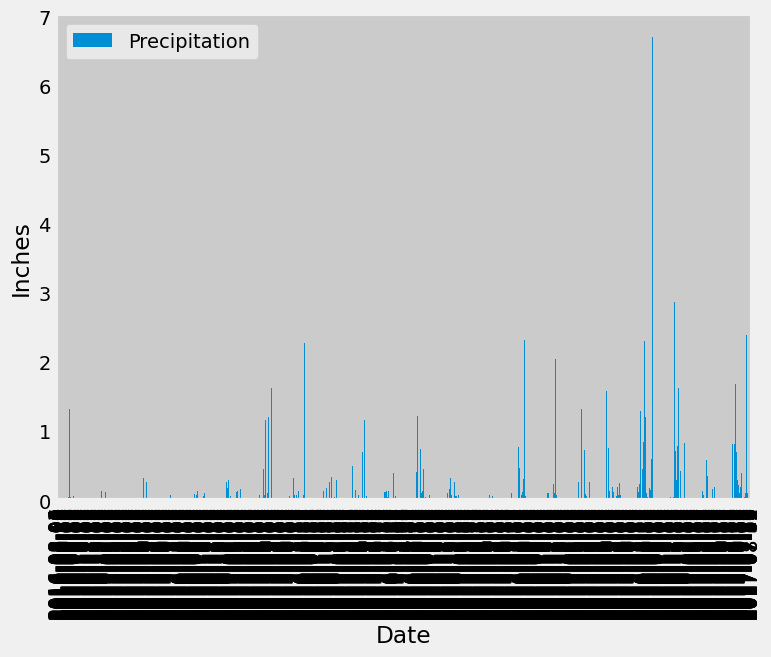

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,3) - dt.timedelta(days=365)
print(query_date)

# Perform a query to retrieve the data and precipitation scores
precipitation_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.date <= '2017-08-03').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_results_df = pd.DataFrame(precipitation_results)
precipitation_results_df.head()

# Sort the dataframe by date
precipitation_results_df.sort_values(by='date')
prec_results_renamed = precipitation_results_df.rename(columns={"date": "Date","prcp":"Precipitation"})
clean_df= prec_results_renamed.dropna(how='any')
clean_df.head()
# Use Pandas Plotting with Matplotlib to plot the data


plot_df = clean_df.plot('Date',"Precipitation",kind="bar",figsize=(8,6), xlabel="Date", ylabel="Inches")



In [56]:
# Use Pandas to calculate the summary statistics for the precipitation data

clean_df.describe()

,Precipitation
count,2066.000000
mean,0.182304
std,0.464260
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

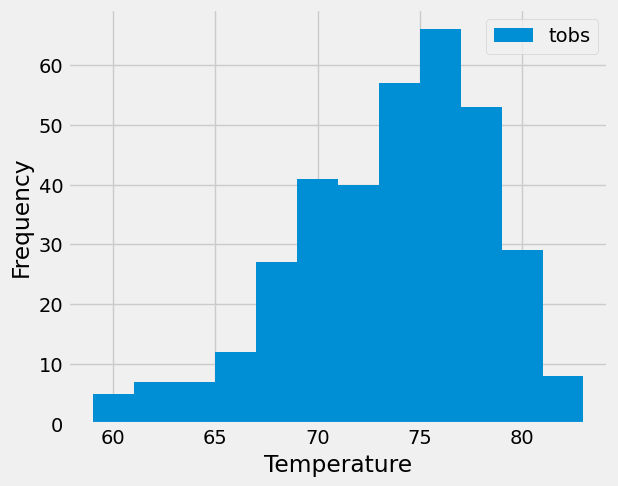

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()